# logistic regression

머신러닝-지도학습(분류, 회귀)
지도학습(입력, 타겟)
- 분류모델(확률) : 로지스틱 회귀, KNN, Trees, 랜덤포레스트
- 회귀모델(예측) : 선형회귀(-> 예측), KNN, Trees, 랜덤포레스트

로지스틱회귀: 무게, 길이, 대각선, 높이, 두께 등 특성이 여러개 사용
선형회귀-다중회귀 : 예측프로그램. 예측의 값은 무한대지만, 분류는 0-1의 값이 되어야 함.
무게 = a*길이^2+b*길이+c

z = a*무게 + b* 길이 + c*대각선 + d*높이 + e*두께 + f
시그모이드 함수, 로지스틱 함수

In [181]:
# from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

무게, 길이, 대각선, 높이, 넓이로 어떤 물고기인지 분류하는 모델 구현

도미 - Bream , 빙어 - Smelt

In [182]:
import pandas as pd
df=pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [183]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [184]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [185]:
df['Weight'].sort_values()

40        0.0
72        5.9
145       6.7
147       7.0
146       7.5
        ...  
125    1100.0
141    1250.0
143    1550.0
142    1600.0
144    1650.0
Name: Weight, Length: 159, dtype: float64

In [186]:
df.shape # (159, 6)

(159, 6)

In [187]:
df.iloc[39:43]

,Species,Weight,Length,Diagonal,Height,Width
39,Roach,120.0,20.0,22.2,6.2160,3.5742
40,Roach,0.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,20.8,23.1,6.1677,3.3957
42,Roach,120.0,21.0,23.7,6.1146,3.2943


In [188]:
# 정답으로 분류하는 물고기 : 7개
df['Species'].unique() # 물고기 종류

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [189]:
df['Species'].value_counts() # 각 물고기의 수

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [190]:
# 데이터 전처리
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [191]:
df.iloc[:,1:]

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [192]:
# 데이터 전처리 : data, targer 세트 분리
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()


In [193]:
# 데이터 전처리 : train, test 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [194]:
# KNN 모델 적용
# 데이터 변환 : fit, transform, 훈련x
# 데이터 측정 : 분류, 회귀 fit, predict, score
# 1. 데이터 표준화 작업 : (데이터-평균)/표준편차

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [195]:
train_scaled # 표준편차 값 적용

array([[ 9.19657820e-01,  6.09431747e-01,  8.10412209e-01,
         1.85194896e+00,  1.00075672e+00],
       [ 3.00412188e-01,  1.54653445e+00,  1.45316551e+00,
        -4.69816625e-01,  2.72917446e-01],
       [-1.08585360e+00, -1.68646987e+00, -1.70848587e+00,
        -1.70159849e+00, -2.00447580e+00],
       [-7.97341433e-01, -6.08801762e-01, -6.74869070e-01,
        -8.24805885e-01, -2.76314705e-01],
       [-7.12898847e-01, -7.30625113e-01, -7.00926637e-01,
        -8.02298036e-02, -7.03386897e-01],
       [-9.12746301e-01, -9.64900787e-01, -9.52816444e-01,
        -8.80171862e-01, -9.91535662e-01],
       [-7.97341433e-01, -7.02512032e-01, -7.61727625e-01,
        -7.82824547e-01, -5.44530184e-01],
       [ 6.38182533e-01,  5.62576612e-01,  7.32239510e-01,
         1.64473401e+00,  5.07057367e-01],
       [-7.41046376e-01, -6.74398951e-01, -7.35670058e-01,
        -6.12059278e-01, -5.57331377e-01],
       [-8.67710255e-01, -7.96222301e-01, -8.92015456e-01,
        -9.33586942e-01

In [196]:
# 데이터 학습시키기
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors=5
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [197]:
# 데이터 예측하기


In [198]:
# 데이터 정답률 구하기 n_neighbors = 3일 때,
print(kn.score(train_scaled, train_target)) # 0.8907563025210085
print(kn.score(test_scaled, test_target)) # 0.85

0.8907563025210085
0.85


In [199]:
test_scaled.shape # (40, 5)

(40, 5)

In [200]:
# target 속성 : 7개
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [201]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [202]:
# predict : 분류한 값을 출력
# predict_proba : 각 특성별로 분류 퍼센트를 출력
proba = kn.predict_proba(test_scaled[:5])
proba 
# 보기 편하게 수정
np.round(proba, decimals=4) 

# print(kn.classes_)에서 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 출력
#  열                       0       1         2       3      4      5         6
# 1열은 2번째 열이 1이니까 100% 확률로 perch
# 2열은 5번째 열이 1이니까 100% 확률로 Smelt
# 3열은 3번째 열이 1이니까 100% 확률로 Pike
# 4, 5열은 2번째 열이 0.6667이니까 약 67% 확률로 Perch, 4번째 열이 0.3333이니까 약 33% 확률로 Roach 두 가지 확률 발생
# [140]에서 4열의 n_neighbors의 주소를 확인해보면 array([['Perch', 'Perch', 'Roach']], dtype=object) 값이 나와.
# 주변에 perch가 2개, roach가 1개가 나와서 각각 67% , 33% 확률로 나옴.

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

n_neighbors의 주소를 확인하여 결과값에 대한 근거 확인([138]~[140])

In [203]:
test_scaled[3] # 1차원 배열, []

array([-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464])

In [204]:
test_scaled[3:4] # 2차원배열, [[]]

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [205]:
# n_neighbors의 주소값 출력
distance, indexes = kn.kneighbors(test_scaled[3:4])
indexes

array([[104, 115, 106]], dtype=int64)

In [206]:
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

In [207]:
# n_neighbors의 주소값 출력
distance, indexes = kn.kneighbors(test_scaled[4:5])
train_target[indexes]

array([['Perch', 'Perch', 'Roach']], dtype=object)

knn 분류는 이미 사용을 해봄. 이미 사용한 것임.

로지스틱 회귀 : 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘 ==> 분류(이름만 회귀)
(예) 0과 1의 사이인 0.5를기준으로 0.5보다 크면 숭어, 작으면 빙어로 분류!

- 직선의 방정식을 구해. 
시그모이드함수, 로지스틱함수
z(예측점수) = a*무게+b*길이+c*대각선+d*높이+e*e*두께+f
1/(1+e**z)

In [208]:
z = np.arange(-5,5,0.1) # -5~5까지 0.1씩 증가, -5~5까지 0.1 단위로 배열생성
z

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [209]:
z.shape # (100,)

(100,)

In [210]:
# 시그모이드함수
phi = 1/(1+np.exp(-z))
phi

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

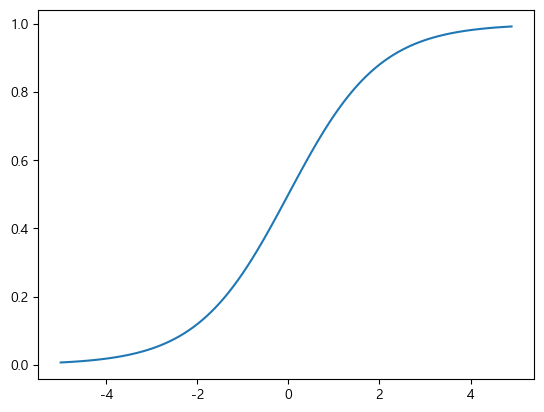

In [211]:
# 그래프 출력 : 100개의 직선 ==> 곡선
plt.plot(z,phi)
plt.show()
# x=0을 기준으로, y=0.5 이상이면 x는 양수, y=0.5 이하면 x는 음수

In [212]:
# 로지스틱 회귀로 이진 분류 : True/False 분류
char_arr = np.array(['A', 'B', 'C', 'D', 'E', 'A', 'B', 'C'])

# A, C 데이터 뽑아오려면,
char_arr[[True, False, True, False, False, True, False, True]]

array(['A', 'C', 'A', 'C'], dtype='<U1')

In [214]:
# df[df=='A' | df=='C']  

In [215]:
# 이진분류형태, 다항분류 형태로 해서 분류모델을 적용 시켜봄.
b_s_df = df[(df['Species']=='Bream') | (df['Species']=='Smelt')]
b_s_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [ ]:
# 로지스틱 회귀 모델을 적용해서 정답률을 출력하시오.    
# train, test 정답률을 출력하시오.

In [221]:
# b_s_df.iloc[:,0:1]
# b_s_df.iloc[:,1:]
# numpy로 바꾸기
f_input=b_s_df.iloc[:,1:].to_numpy()
f_target =b_s_df['Species'].to_numpy()

In [227]:
# train, test
train_input, test_input, train_target, test_target = train_test_split(
    f_input, f_target, random_state=42
)

In [229]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [235]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)


LogisticRegression()

In [236]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


1.0
1.0


In [238]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [239]:
lr.predict(train_scaled[:5])

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype=object)

In [237]:
print(lr.predict_proba(train_scaled[:5]))

[[0.97781589 0.02218411]
 [0.95701776 0.04298224]
 [0.98230024 0.01769976]
 [0.04076162 0.95923838]
 [0.04518953 0.95481047]]


In [240]:
# 로지스틱 회귀 - 선을 가지고 있음. 기울기, y절편
# 각각의 특성의 기울기 존재, 특성 5개
lr.coef_, lr.intercept_
# array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]), # lf.coef_로 특성(=column)이 5개 이므로 기울기 5개,
# array([-2.38186126])


(array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]),
 array([-2.38186126]))

In [243]:
train_scaled[0]

array([0.09920189, 0.37460577, 0.41303385, 0.46524998, 0.37261369])

In [250]:
z = 0.09920189*(-0.57717269)+0.37460577*(-0.79233938)+0.41303385*(-0.82533982)+0.46524998*(-0.86579233)+0.37261369*(-0.82205625)+(-2.38186126)
z

-3.7859453455802297

In [242]:
decisions = lr.decision_function(train_scaled[:5])
decisions

array([-3.78594535, -3.10303503, -4.01634616,  3.15839875,  3.0506475 ])

In [249]:
# 시그모이드 함수
# phi = 1/1(+np.exp(-z))

In [251]:
from scipy.special import expit

# 시그모이드 함수를 적용
expit(decisions)

array([0.02218411, 0.04298224, 0.01769976, 0.95923838, 0.95481047])

In [252]:
# -, 0                          +, 1
# 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'
# [0.02218411, 0.04298224, 0.01769976, 0.95923838, 0.95481047]